# This Assignment task consists of 
1. Data preparation
2. Data splitting (train and test)
3. Use data visualization for EDA

# Lets import libraries
1. Numpy (array)
2. Pandas (dataframe, series and manipulating data)
3. Matplotlib (for data visulization)
4. Seaborn (nicer matplotlib visulization plot)
5. sklearn preprocessing (for label encoder, Standardscaler and etc)
6. sklearn model_selection (train_test_split)
7. other sklearn model libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report

# 1.Data Preparation
## Reading the data from CSV
use `ls` to be sure if you are in the same directory of the file 

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C61D-20DA

 Directory of C:\Users\HP\OneDrive\Mahidol\Data mining

10/16/2021  03:22 AM    <DIR>          .
10/12/2021  09:19 AM    <DIR>          ..
10/16/2021  01:57 AM    <DIR>          .ipynb_checkpoints
10/12/2021  09:15 AM         3,056,227 predm.csv
10/16/2021  03:22 AM           189,773 predm_Pongsakorn .ipynb
               2 File(s)      3,246,000 bytes
               3 Dir(s)  388,849,700,864 bytes free


## Reading the data with `pd.read_csv` as it an CSV file
as stated in the assignment use only ['age', 'gender', 'glu', 'hdl', 'ldl', 'bmi2dom', 'HbA1C']

In [3]:
df = pd.read_csv('predm.csv', usecols=['age', 'gender', 'glu', 'hdl', 'ldl', 'bmi2dom', 'HbA1C'])

## Basic exploration of the overview of the dataset
Let check the first 10 columns with .head()

In [4]:
df.head(10)

,age,gender,glu,hdl,ldl,bmi2dom,HbA1C
0,51.0,1,105,40,150,27.0,NaN
1,53.0,1,110,71,140,30.0,6.3
2,53.0,1,123,51,103,28.0,NaN
3,52.0,1,110,50,118,NaN,NaN
4,52.0,1,99,42,101,25.0,NaN
5,53.0,1,101,56,182,23.0,5.8
6,53.0,1,106,65,115,23.0,5.6
7,50.0,1,114,68,166,26.0,7.0
8,53.0,1,117,32,121,21.0,7.9
9,52.0,1,97,48,184,23.0,5.8


### use `describe` to see the descritive statistic 
from the result, we can see the std of the each column and min and max of it.Also thing such as the mean and each quantile

In [5]:
df.describe()

,age,gender,glu,hdl,ldl,bmi2dom,HbA1C
count,484.000000,489.000000,489.000000,489.000000,489.000000,480.000000,431.000000
mean,43.487603,1.134969,104.036810,47.488753,151.642127,25.772917,6.033875
std,6.475455,0.342041,7.434873,9.956482,39.740458,3.910867,1.099921
min,25.000000,1.000000,97.000000,21.000000,53.000000,17.000000,4.500000
25%,39.000000,1.000000,99.000000,41.000000,124.000000,23.000000,5.500000
50%,44.000000,1.000000,101.000000,46.000000,151.000000,25.000000,5.800000
75%,49.000000,1.000000,106.000000,53.000000,180.000000,28.000000,6.100000
max,77.000000,2.000000,124.000000,95.000000,351.000000,48.000000,17.500000


using `df.info()` return a list that tell us info on each features(column)
<b>Insight: </b>As there are 489 records(rows). we can see that age,bmi2dom,HbA1C are missing some rows. Moreover, we can see that there are two data types in this list, which are float64 and int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      484 non-null    float64
 1   gender   489 non-null    int64  
 2   glu      489 non-null    int64  
 3   hdl      489 non-null    int64  
 4   ldl      489 non-null    int64  
 5   bmi2dom  480 non-null    float64
 6   HbA1C    431 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 26.9 KB


# Dealing with missing data
the `df.isna()` function return a dataset with boolean type. True means nan(Not a number) and False means not nan. However returning this is not useful so the sum() function sum up the True as 1 this return us the missing value of each column in form of series.

### Insight from the result below there are 5 missing values in age columns and around 58 for HbA1C

In [7]:
df.isna().sum()

age         5
gender      0
glu         0
hdl         0
ldl         0
bmi2dom     9
HbA1C      58
dtype: int64

## Drop NAN value
using `df.dropna(axis = 0)` to drop the missing value by row(axis = 0). If set as axis=1 it will drop the whole column with missing value which is not ideal in our scenario 

In [8]:
df = df.dropna(axis = 0)

Checking if the missing data is dropped

<b>Insight</b> : The function returned 0 in all columns this indicates that there is no missing value left

In [9]:
df.isna().sum()

age        0
gender     0
glu        0
hdl        0
ldl        0
bmi2dom    0
HbA1C      0
dtype: int64

# Data Encoding
1. map the target column y (HbA1C) into yes(>=6.5) else no

## Explore current df 
<b>Insight:</b> No missing data now

In [10]:
df.head()

,age,gender,glu,hdl,ldl,bmi2dom,HbA1C
1,53.0,1,110,71,140,30.0,6.3
5,53.0,1,101,56,182,23.0,5.8
6,53.0,1,106,65,115,23.0,5.6
7,50.0,1,114,68,166,26.0,7.0
8,53.0,1,117,32,121,21.0,7.9


# Mapping value in HbA1C which have more or equal to 6.5 as yes else no
using `apply` and `lambda`to replace the HbA1C with yes and no instead of numerical to tell they have diabetes

In [11]:
df['dm'] = df['HbA1C'].apply(lambda x: 'yes' if x>=6.5 else 'no')

The HbA1c columns has been mapped to no and yes

In [12]:
df.head()

,age,gender,glu,hdl,ldl,bmi2dom,HbA1C,dm
1,53.0,1,110,71,140,30.0,6.3,no
5,53.0,1,101,56,182,23.0,5.8,no
6,53.0,1,106,65,115,23.0,5.6,no
7,50.0,1,114,68,166,26.0,7.0,yes
8,53.0,1,117,32,121,21.0,7.9,yes


## Binary Encoding on dm to yield value of 1 and 0
1. using label encoder
2. using get dummies
3. using map

These 3 method will return similar result. Which encode categorical value into integer.

This is `map` method(let assign it to dm_encoded for further data exploration below)

In [13]:
df['dm_encoded']=pd.DataFrame(df['dm'].map({'yes':1,'no':0}))
df['dm_encoded'].head()

1    0
5    0
6    0
7    1
8    1
Name: dm_encoded, dtype: int64

This is `get dummies` method from pandas. It is quite normal to set drop_first as True as the first column can be interpret when other column is false

In [14]:
(pd.get_dummies(df['dm'], drop_first=True)).head()

,yes
1,0
5,0
6,0
7,1
8,1


`LabelEncoder` from sklearn.preprocessing also perform a similar job

In [15]:
labelencoder = LabelEncoder()#need to create an instance first
(pd.DataFrame(labelencoder.fit_transform(df['dm']),columns =['dm'])).head()

,dm
0,0
1,0
2,0
3,1
4,1


`labelencoder` has a method called `classes_` this return what is encoded in index order. To intiate this type in `labelencoder.classes_`

In [16]:
labelencoder.classes_

array(['no', 'yes'], dtype=object)

# Splitting data into train and test
1. Clarify X and y
2. Using sklearn.model_selection.train_test_split
3. using Poom train_test_split function from scratch

### Our y (Output) is dm column ,therefore, our X (Input) will be all the features excluding dm and dm_encoded

In [17]:
X = df.drop(['dm','dm_encoded'],axis = 1)
y = df['dm']

## Lets try the train_test_split from sklearn.model_selection
set test size as 0.2 this mean the training set will be 0.7 of the original data and random_state as 42

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

Check the shape of X_train,X_test, y_train and y_test 

In [20]:
print(f'X_train shape:{X_train.shape}, X_test shape: {X_test.shape}, y_train shape:{y_train.shape}, y_test shape: {y_test.shape} ')

X_train shape:(340, 7), X_test shape: (85, 7), y_train shape:(340,), y_test shape: (85,) 


## Lets try my own train_test_split function
set test size as 0.2 this mean the training set will be 0.7 of the original data and random_state as 42

The function consists of
1. setting the random_state so it will match with the original function and came from the same distribution
2. using permutation for randomly ranging indexes
3. slicing within the indexing of the x and y according to the test size * n then cast to int() in order to round it up

<b>check the comment for row by row explanation</b>

In [21]:
def poom_train_test_split(x,y,test_size=0.2, random_state = 42):#function parameters are x, test size and randome state
    import numpy as np# import numpy incase the user didnt import it 
    np.random.random_state(random_state)#set random state
    perm = np.random.permutation(len(x))# create a numpy array with random variation of number within the len of x
    sliced = int(len(x)*test_size)# create the number of test size and round it if decimal with int()
    x_train = x[perm[sliced:]]# slicing for xtrain
    y_train = y[perm[sliced:]]# slicing for ytrain
    x_test = x[perm[:sliced]]# slicing for xtest
    y_test = y[perm[:sliced]]# slicing for ytest
    return x_train, x_test, y_train, y_test # return in the same manner as sklearn train test split format

In [22]:
poom_X_train, poom_X_test, poom_y_train, poom_y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

Check the shape of poom_X_train,poom_X_test, poom_y_train and poom_y_test 

In [23]:
print(f'poom_X_train shape:{poom_X_train.shape}, poom_X_test shape: {poom_X_test.shape}, poom_y_train shape:{poom_y_train.shape}, poom_y_test shape: {poom_y_test.shape} ')

poom_X_train shape:(340, 7), poom_X_test shape: (85, 7), poom_y_train shape:(340,), poom_y_test shape: (85,) 


# Comparison of Sklearn train test split result against Poom train test split


train shape comparison

<b>Insight:</b> Both the sklearn train test split and the one from scratch (poom train test split) yield the same result and same index distribution

In [24]:
np.mean(X_train == poom_X_train)

age        1.0
gender     1.0
glu        1.0
hdl        1.0
ldl        1.0
bmi2dom    1.0
HbA1C      1.0
dtype: float64

In [25]:
np.mean(y_train ==poom_y_train)

1.0

check by index random

In [26]:
X_test.index == poom_X_test.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

# Data visualization and exploration

## Using seaborn lets do some visualization 

### Countplot to visualize data
The countplot visualization below shown the number of dm diagnosed with yes and no dm

<b>Insight: </b>There is more no (no dm) than have dm

<AxesSubplot:xlabel='dm', ylabel='count'>

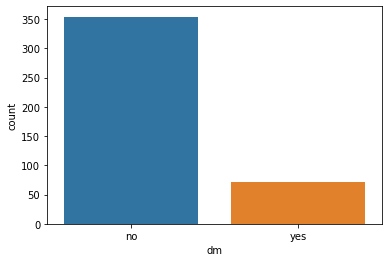

In [27]:
sns.countplot(x = 'dm', data = df)

## In order to get more insight lets set hue as gender
This will enable us to see which gender have dm more than each other

<b>According to google: Men are almost twice as likely to develop type 2 diabetes as women.</b> This could indicate that gender no1 is Male and gender no2 is female.

<b>Insight: </b> From the visualization below we can see that gender no1 is more prone to having dm than gender no2. Moreover, seems like from our dataset there is more gender no1(<b>Male</b>) than gender no 2(<b>Female</b>)

<AxesSubplot:xlabel='gender', ylabel='count'>

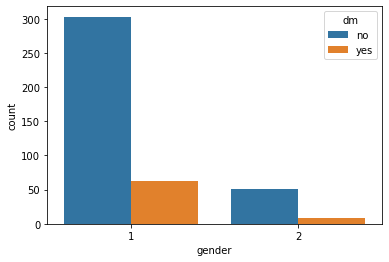

In [28]:
sns.countplot(x = 'gender', hue = 'dm', data = df)

## Histogram
<strong>Histogram using sns.hisplot</strong>

In the plot below, the function parameter are age then hue parameter is Grouping variable that will produce points with different colors, the graph below set hue as dm.

<b>Insight:</b><i> People who are diagnosed with dm are around age group of 30 to mid 50 with 50 being the most</i>

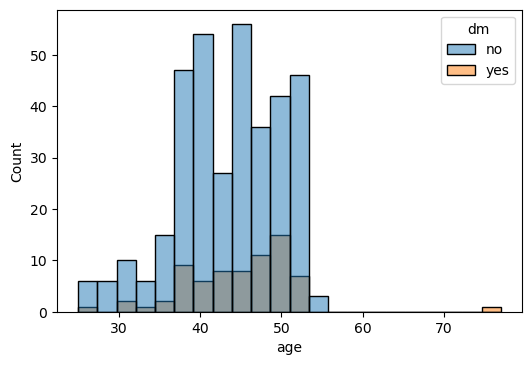

In [29]:
plt.figure(dpi = 100)
sns.histplot(x = 'age', hue = 'dm', data = df);

## Correlation Heatmap
<p>Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables. The values will be between -1 and 1 with 1 being highly correlated</p> 

<b>Insight: </b> According to the heatmap below there is a high correlation between HbA1C and dm_encoded as dm is dervived from HbA1c a strong indicator (highest is 0.72)

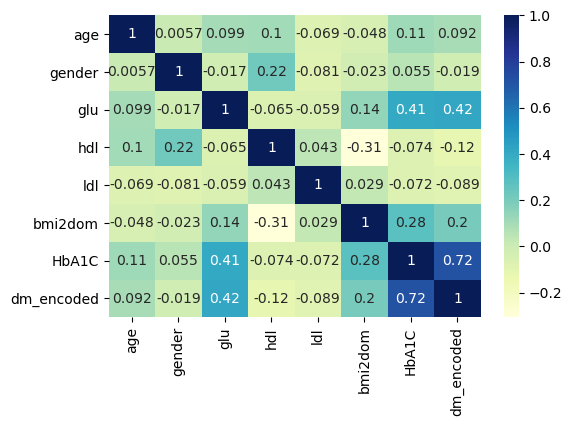

In [30]:
plt.figure(dpi=100)
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu");

# Correlation Barchart of Dm_encoded
<b>Insight: </b> from the barchart below we can elaborate more that HbA1C is strongly correlated with dm as we derived from it.Moreover, the glu also seem correlated with dm. Lets explore glu in the next panel

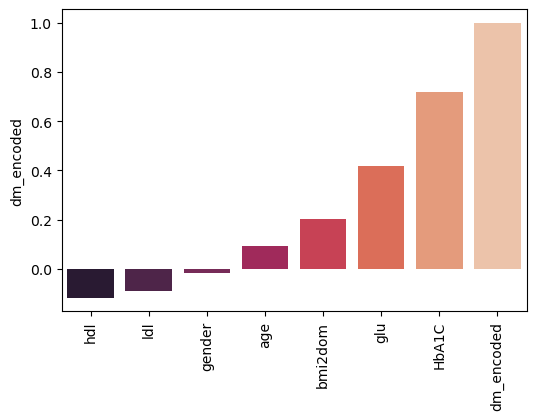

In [31]:
dm_corr = df.corr()['dm_encoded'].sort_values()
plt.figure(dpi = 100)
sns.barplot(x = dm_corr.keys(), y = dm_corr, palette='rocket')
plt.xticks(rotation = 90);

# Glu exploration against dm
1. catplot
2. boxplot

## Catplot
<b>Insight: </b> the catplot below doesnt difficiate much seems like there is outlier in some of them making it difficult to differentiate. <i>Lets try boxplot to visualize better</i>

<Figure size 600x400 with 0 Axes>

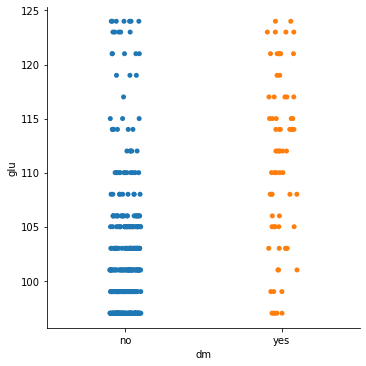

In [32]:
plt.figure(dpi=100)
sns.catplot(data = df, x = df['dm'],y =df['glu']);

## Boxplot
<b>Insight: </b> the boxplot in the other hand, give us a clear separator as people with no dm tend to have 105 or lower. However, there are some outlier(<strong> This might be the reason for making the catplot ineffective</strong>). For the people diagnosed with dm tend to have glu of 105-117.

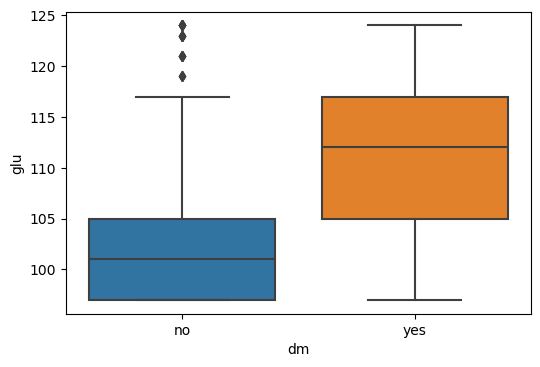

In [33]:
plt.figure(dpi=100)
sns.boxplot(data = df, x = df['dm'],y =df['glu']);

# End of assignment 1
# Modelling cont